In [1]:
import numpy as np
import pandas as pd
import ast

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_science_asia_clean.csv", index_col = 0)

In [3]:
def convert_to_tuple(value):
    if pd.notna(value):
        return ast.literal_eval(value)
    else:
        return value
for col in df.columns:
    check_value = df[col].iloc[0]
    if (pd.isnull(check_value)):
        i = 1
        while(pd.isnull(check_value)):
            check_value = df[col].iloc[i]
            i += 1
    if isinstance(check_value, str):
        if(check_value[0] == '('):
            df[col] = df[col].apply(convert_to_tuple)
df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,(University Courses (resulting in a university...,"(Kaggle (notebooks, competitions, etc),)",Master’s degree,1-3 years,"(Python, SQL)","( PyCharm , Jupyter Notebook)","(None,)","( Matplotlib , Seaborn )",1-2 years,"( Scikit-learn ,)","(Linear or Logistic Regression, Decision Trees...","(No, I do not download pre-trained model weigh...",NaN
2,174,25-29,Woman,China,Yes,"(Kaggle Learn Courses, University Courses (res...","(University courses, Online courses (Coursera,...",Master’s degree,< 1 years,"(Python, MATLAB)","( Visual Studio , MATLAB , Jupyter Notebook)","(Colab Notebooks, Google Cloud Vertex AI Workb...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"(Udemy,)","(Online courses (Coursera, EdX, etc),)",Master’s degree,3-5 years,"(Python,)","( Visual Studio Code (VSCode) , Jupyter Noteb...","( Kaggle Notebooks, Colab Notebooks)","( Seaborn ,)",2-3 years,"( Scikit-learn , PyTorch , Xgboost , Light...","(Decision Trees or Random Forests, Dense Neura...","( Huggingface Models ,)","(Kaggle (notebooks, forums, etc),)"
4,283,22-24,Woman,China,Yes,(University Courses (resulting in a university...,"(University courses, Social media platforms (R...",I prefer not to answer,< 1 years,"(Python, MATLAB, Other)","( Visual Studio , PyCharm , MATLAB )","(Google Cloud Vertex AI Workbench ,)","(None,)",Under 1 year,"( TensorFlow ,)","(None,)","(Other storage services (i.e. google drive),)","(Other,)"
5,492,40-44,Man,Japan,No,"(Kaggle Learn Courses,)","(Video platforms (YouTube, Twitch, etc), Kaggl...",No formal education past high school,< 1 years,"(Python,)","( Notepad++ , Jupyter Notebook)","(None,)","(None,)",I do not use machine learning methods,NaN,NaN,NaN,"(Kaggle (notebooks, forums, etc),)"


In [4]:
df.shape

(1538, 18)

### Phân tích xem những người có trình độ học vấn cao hơn có xu hướng sử dụng những product hoặc nền tảng nào khi bắt đầu học data science
Điều này có thể cung cấp thông tin về sự ưu tiên và lựa chọn của người học tương ứng với trình độ học vấn.

Đầu tiên ta rút dữ liệu từ hai columns cần thông tin và lưu vào `df_1`

In [5]:
df_1 = df[['What products or platforms did you find to be most helpful when you first started studying data science?',"What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"]].dropna()

Ta lấy những trình độ học vấn xuất hiện và lưu vào arrray

In [6]:
arr_level = df_1["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"].unique()
arr_level

array(['Master’s degree', 'I prefer not to answer',
       'No formal education past high school', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Bachelor’s degree', 'Professional doctorate'], dtype=object)

Ta lấy dữ liệu theo từng mức trình độ học vấn bao gồm các product và nền tảng lưu vào dict

In [7]:
dict_level_products_platforms= {}
for i in arr_level:
    flattened_values = df_1[df_1["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"]==i]['What products or platforms did you find to be most helpful when you first started studying data science?'].explode()
    dict_level_products_platforms[i] = flattened_values.value_counts().to_dict()
dict_level_products_platforms

{'Master’s degree': {'Kaggle (notebooks, competitions, etc)': 320,
  'Online courses (Coursera, EdX, etc)': 233,
  'Video platforms (YouTube, Twitch, etc)': 230,
  'University courses': 173,
  'Social media platforms (Reddit, Twitter, etc)': 91,
  'Other': 44,
  'None / I do not study data science': 22},
 'I prefer not to answer': {'Kaggle (notebooks, competitions, etc)': 76,
  'Video platforms (YouTube, Twitch, etc)': 58,
  'Online courses (Coursera, EdX, etc)': 50,
  'University courses': 30,
  'Social media platforms (Reddit, Twitter, etc)': 29,
  'Other': 22,
  'None / I do not study data science': 9},
 'No formal education past high school': {'Kaggle (notebooks, competitions, etc)': 49,
  'Video platforms (YouTube, Twitch, etc)': 45,
  'Online courses (Coursera, EdX, etc)': 27,
  'University courses': 13,
  'Social media platforms (Reddit, Twitter, etc)': 13,
  'None / I do not study data science': 11,
  'Other': 10},
 'Doctoral degree': {'Kaggle (notebooks, competitions, etc)': 9

Ta xoá một số dữ liệu không có ích để việc phân tích hiệu quả hơn

In [8]:
# Delete None values
for library in dict_level_products_platforms:
    del dict_level_products_platforms[library]['None / I do not study data science']
del dict_level_products_platforms['I prefer not to answer']

Sắp xếp lại các trình độ học vấn theo thứ tự từ cao đến thấp

In [9]:
level = ['Doctoral degree',
'Professional doctorate',
'Master’s degree',
'Bachelor’s degree',
'Some college/university study without earning a bachelor’s degree',
'No formal education past high school',
'I prefer not to answer',]

Ta sẽ dùng biểu đồ đường để thấy được sự phân bố và chêch lệch của các nền tảng theo trình độ học vấn đã sắp xếp

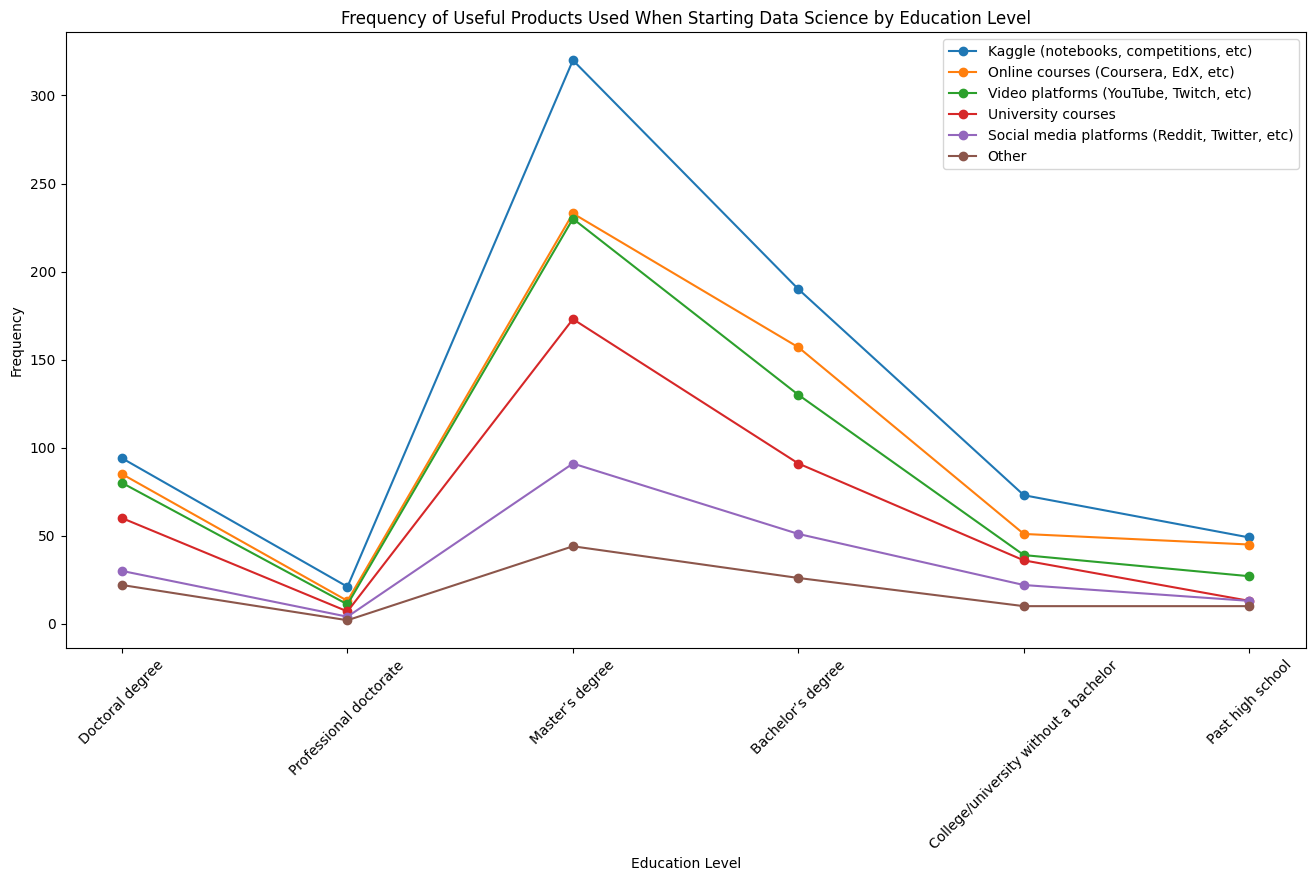

In [10]:
education_levels = ['Doctoral degree',
'Professional doctorate',
'Master’s degree',
'Bachelor’s degree',
'Some college/university study without earning a bachelor’s degree',
'No formal education past high school']
product_frequencies = []
for education_level in education_levels:
    product_frequencies.append(list(dict_level_products_platforms[education_level].values()))

# Vẽ biểu đồ đường
plt.figure(figsize=(16, 8))

for i in range(len(product_frequencies[0])):
    frequencies = [product[i] for product in product_frequencies]
    plt.plot(education_levels, frequencies, marker='o', label=list(list(dict_level_products_platforms.values())[0].keys())[i])

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Frequency of Useful Products Used When Starting Data Science by Education Level')
plt.legend()
short_levels = ['Doctoral degree',
'Professional doctorate',
'Master’s degree',
'Bachelor’s degree',
'College/university without a bachelor',
'Past high school']
plt.xticks(education_levels, short_levels, rotation=90)
plt.xticks( rotation=45)
plt.show()

Từ biểu đồ này, ta thấy được dữ chênh lệch giữa trình độ học vấn khi tham gia cuộc khảo sát. Những người tham gia cuộc khảo sát này đa số là **Master’s degree, Bachelor’s degree, Doctoral degree**. Có vẻ những người học nghành Data Science đều cần học vấn khá cao để làm việc (đa số đều từ bậc Bachelor’s degree trở lên) nên rất ích người chưa hoàn thành chương trình đại học.

Các sản phẩm phổ biến nhất cho tất cả các mức trình độ học vấn là "Kaggle (notebooks, competitions, etc)", "Online courses (Coursera, EdX, etc)", và "Video platforms (YouTube, Twitch, etc)". Điều này cho thấy rằng các nguồn tài liệu trực tuyến và các nền tảng học tập trực tuyến có vai trò quan trọng trong việc học Data Science.

Trong mỗi mức trình độ học vấn, có sự chênh lệch trong tần suất sử dụng các nguồn tài liệu học tập. Ví dụ với trình độ là Master’s degree, lượng người dùng Kaggle có sự chêch lệch với các nguồn khác lớn hơn so với các bậc khác. Cho thấy Kaggle là một nguồn tài liệu rất hữu ích với trình độ học vấn này.

### Phân tích xem những framework Machine Learning phổ biến thường được sử dụng với những thuật toán Machine Learning nào. 
Điều này giúp bạn hiểu cách mà người dùng kết hợp các công cụ này trong công việc Machine Learning của họ.

Chọn 2 cột chưa thông tin để xử lý và lưu vào `split_df`

In [11]:
split_df = df[['Which of the following machine learning frameworks do you use on a regular basis?','Which of the following ML algorithms do you use on a regular basis?']].dropna()

Chọn ra những framework Machine Learning phố biến nhất để phân tích. Ở đây, ta sẽ chọn 4 thư viện xuất hiện nhiếu nhất trong cột **Which of the following machine learning frameworks do you use on a regular basis?**

In [12]:
dict_ml_frameworks = split_df['Which of the following machine learning frameworks do you use on a regular basis?'].explode().value_counts().to_dict()
top4_ml_frameworks = list(dict_ml_frameworks.keys())[0:4]
top4_ml_frameworks

['  Scikit-learn ', ' PyTorch ', '  TensorFlow ', ' Keras ']

Với từng thư viện phố biến, ta sẽ đếm số lần xuất hiện của các thuật toán Machine Learning sau đó lưu vào `dict_ml_frameworks_algorithms` với key là tên framework và value là dict chứa các thuật toán và số lần xuất hiện của nó.

In [13]:
dict_ml_frameworks_algorithms= {}
for i in top4_ml_frameworks:
    flattened_values = split_df[split_df['Which of the following machine learning frameworks do you use on a regular basis?'].apply(lambda x: any(i in item for item in x))]['Which of the following ML algorithms do you use on a regular basis?'].explode()
    dict_ml_frameworks_algorithms[i] = flattened_values.value_counts().to_dict()
dict_ml_frameworks_algorithms

{'  Scikit-learn ': {'Linear or Logistic Regression': 486,
  'Decision Trees or Random Forests': 397,
  'Gradient Boosting Machines (xgboost, lightgbm, etc)': 370,
  'Convolutional Neural Networks': 354,
  'Dense Neural Networks (MLPs, etc)': 227,
  'Transformer Networks (BERT, gpt-3, etc)': 198,
  'Recurrent Neural Networks': 194,
  'Bayesian Approaches': 162,
  'Autoencoder Networks (DAE, VAE, etc)': 90,
  'Generative Adversarial Networks': 87,
  'Graph Neural Networks': 77,
  'None': 34,
  'Evolutionary Approaches': 29,
  'Other': 11},
 ' PyTorch ': {'Convolutional Neural Networks': 381,
  'Linear or Logistic Regression': 349,
  'Gradient Boosting Machines (xgboost, lightgbm, etc)': 252,
  'Decision Trees or Random Forests': 242,
  'Transformer Networks (BERT, gpt-3, etc)': 233,
  'Dense Neural Networks (MLPs, etc)': 221,
  'Recurrent Neural Networks': 189,
  'Bayesian Approaches': 120,
  'Generative Adversarial Networks': 105,
  'Autoencoder Networks (DAE, VAE, etc)': 96,
  'Graph 

Biểu đồ multiple bar chart này cho phép bạn so sánh sự sử dụng của các kỹ thuật khác nhau trong các thư viện Scikit-learn, PyTorch, TensorFlow và Keras. Ta có thể dễ dàng nhìn thấy mức độ sử dụng của mỗi kỹ thuật trong mỗi thư viện và so sánh chúng với nhau. Vẽ một plot bar chart với trục x là các kỹ thuật và trục y là số lần sử dụng tương ứng. 

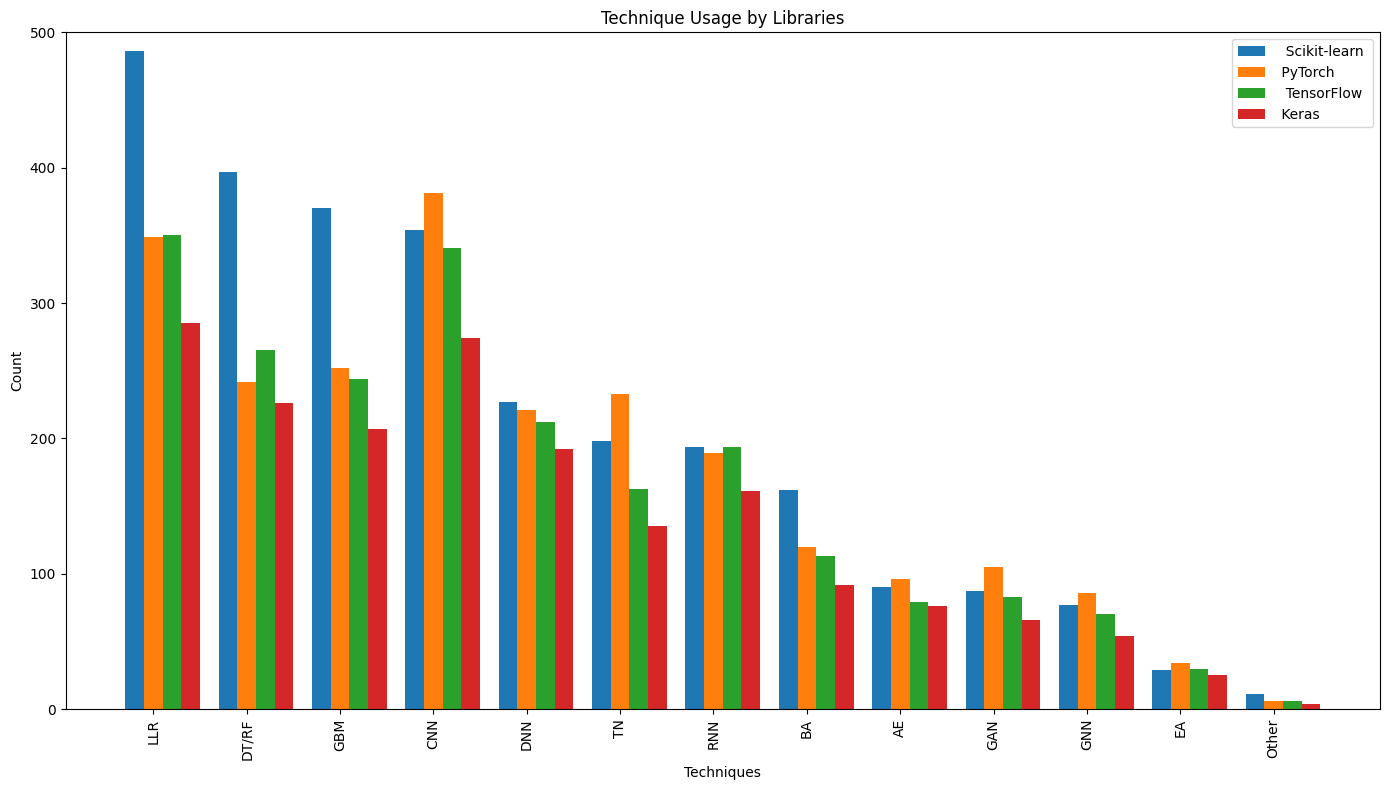

In [14]:
# Mapping of full names to abbreviations
name_to_abbrev = {
    'Convolutional Neural Networks': 'CNN',
    'Linear or Logistic Regression': 'LLR',
    'Decision Trees or Random Forests': 'DT/RF',
    'Gradient Boosting Machines (xgboost, lightgbm, etc)': 'GBM',
    'Dense Neural Networks (MLPs, etc)': 'DNN',
    'Transformer Networks (BERT, gpt-3, etc)': 'TN',
    'Recurrent Neural Networks': 'RNN',
    'Bayesian Approaches': 'BA',
    'Autoencoder Networks (DAE, VAE, etc)': 'AE',
    'Generative Adversarial Networks': 'GAN',
    'Graph Neural Networks': 'GNN',
    'Evolutionary Approaches': 'EA',
    'None': 'None',
    'Other': 'Other'
}

# Delete None values
for library in dict_ml_frameworks_algorithms:
    del dict_ml_frameworks_algorithms[library]['None']

# Extract the techniques and libraries
techniques = list(dict_ml_frameworks_algorithms[list(dict_ml_frameworks_algorithms.keys())[0]].keys())
libraries = list(dict_ml_frameworks_algorithms.keys())

# Set the position of each technique on the x-axis
x = np.arange(len(techniques))

# Set the width and size of the bars
width = 0.2
plt.figure(figsize=(14,8))

# Plotting the bars for each library
plt.bar(x - width, [dict_ml_frameworks_algorithms[libraries[0]][technique] for technique in techniques], width, label=libraries[0])
plt.bar(x, [dict_ml_frameworks_algorithms[libraries[1]][technique] for technique in techniques], width, label=libraries[1])
plt.bar(x + width, [dict_ml_frameworks_algorithms[libraries[2]][technique] for technique in techniques], width, label=libraries[2])
plt.bar(x + 2 * width, [dict_ml_frameworks_algorithms[libraries[3]][technique] for technique in techniques], width, label=libraries[3])

# Customize the x-axis tick labels with abbreviations
abbreviations = [name_to_abbrev[technique] for technique in techniques]
plt.xticks(x, abbreviations, rotation=90)

# Set the title and labels
plt.title('Technique Usage by Libraries')
plt.xlabel('Techniques')
plt.ylabel('Count')
plt.ylim(0, 500)

# Create a legend for the libraries
plt.legend()

plt.tight_layout()
plt.show()

Từ biểu đồ này, chúng ta có thể rút ra một số kết luận về việc sử dụng các thuật toán Machine Learning trong các thư viện Machine Learning và Deep Learning.

Scikit-learn và PyTorch là hai thư viện phổ biến được sử dụng nhiều nhất trong cộng đồng Machine Learning và Deep Learning.

TensorFlow và Keras cũng được sử dụng khá phổ biến, tuy nhiên không đạt được mức độ sử dụng như Scikit-learn và PyTorch.

Tổng quan, Scikit-learn và PyTorch là hai thư viện phổ biến được sử dụng rộng rãi với một loạt các thuật toán học máy khác nhau. TensorFlow và Keras, trong khi không sử dụng nhiều thuật toán truyền thống như DT/RF và GBM, lại tập trung nhiều vào Deep Learning với CNN, DNN và RNN. Trong khi đó, Scikit-learn có sự đa dạng hơn với sự sử dụng của các thuật toán truyền thống và cũng hỗ trợ một số thuật toán Deep Learning.